In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

For n_clusters = 2, the silhouette score is 0.3706886243538429


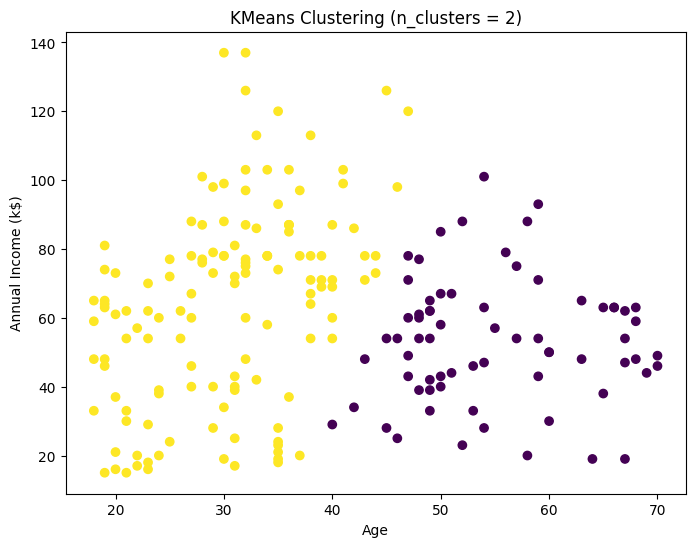

For n_clusters = 3, the silhouette score is 0.4437863926928188


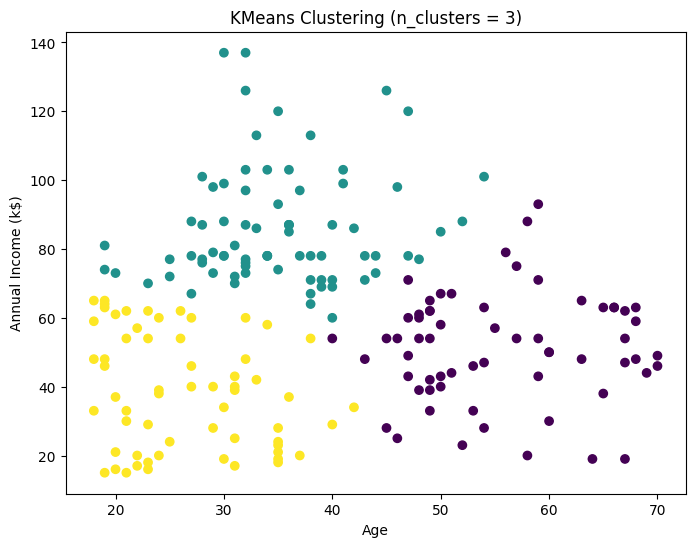

For n_clusters = 4, the silhouette score is 0.40629262670848587


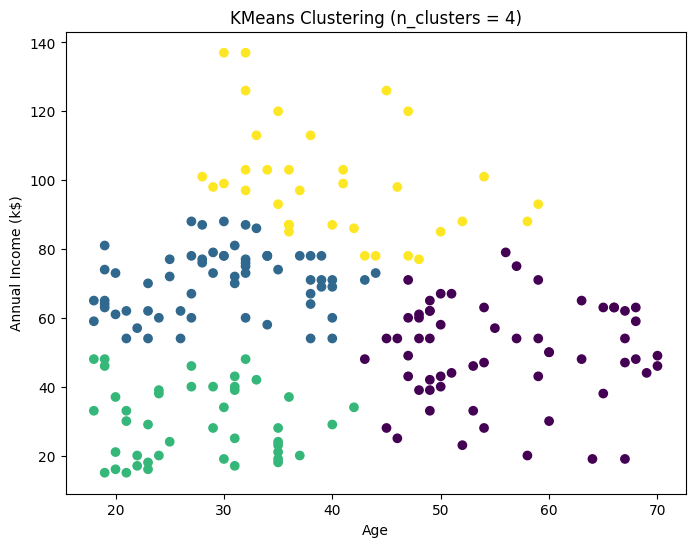

For n_clusters = 5, the silhouette score is 0.39886420102674996


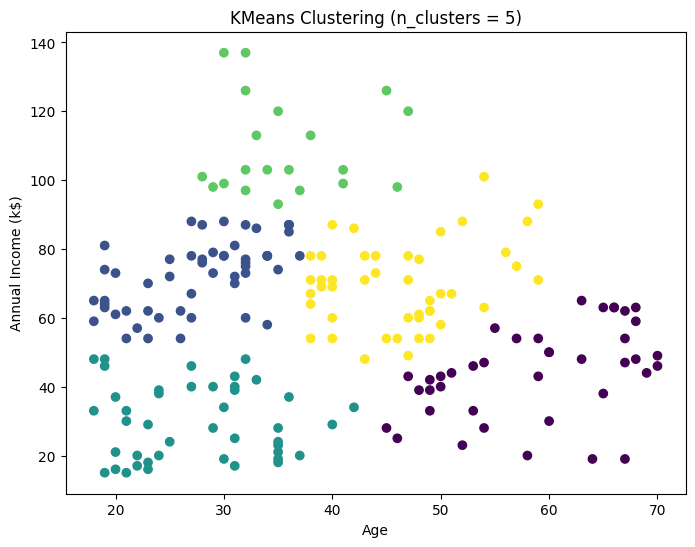


Best Silhouette Score: 0.4437863926928188 with 3 clusters.


In [3]:
data = pd.read_csv('/content/Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)']
X = data[features]
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_n_clusters = -1

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

    if silhouette_avg > best_score:
      best_score = silhouette_avg
      best_n_clusters = n_clusters


    plt.figure(figsize=(8, 6))
    plt.scatter(X['Age'], X['Annual Income (k$)'], c=labels, cmap='viridis')
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title(f'KMeans Clustering (n_clusters = {n_clusters})')
    plt.show()

print(f"\nBest Silhouette Score: {best_score} with {best_n_clusters} clusters.")
